# Coupled Logistics Maps: Unsynchronised, WS, and SS

## Phase Space Plots
$f(x) = 4ax(1 - x)$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate
from scipy.spatial import cKDTree
from numba import njit
import csv

In [3]:
def clm(x, y, yres, k, a = 1):
    x_next = 4 * a * x * (1 - x)
    y_next = (4 * a * y * (1 - y)) * (1 - k) + (4 * a * k * x * (1 - x))
    yres_next = (4 * a * yres * (1 - yres)) * (1 - k) + (4 * a * k * x * (1 - x))
    return x_next, y_next, yres_next

In [4]:
def plotgraf(initial, k, a, n_iterations, n_transients):
    x, y, yres = initial
    x_vals, y_vals, yres_vals = [], [], []
    
    for i in range(n_iterations):
        x, y, yres = clm(x, y, yres, k, a = 1)
        if i >= n_transients:
            x_vals.append(x)
            y_vals.append(y)
            yres_vals.append(yres)
    
    # y-x phase portrait
    plt.figure()
    plt.plot(x_vals, y_vals, 'o', markersize = 1)
    plt.title(f'$x$-$y$ Phase Portrait ($k$ = {k})')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()
    
    # y-y' phase portrait
    plt.figure()
    plt.plot(y_vals, yres_vals, 'o', markersize = 1)
    plt.title(f"$y$-$y$\' Phase Portrait ($k$ = {k})")
    plt.xlabel('y')
    plt.ylabel('y\'')
    plt.grid(True)
    plt.show()

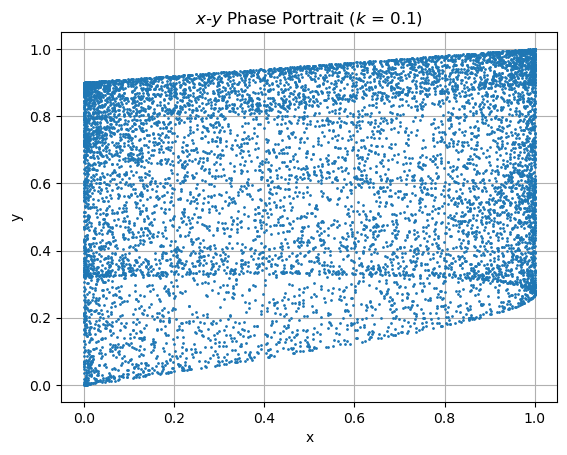

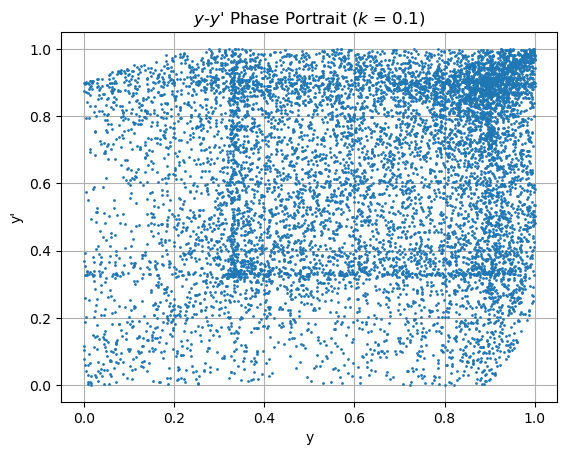

In [5]:
# Unsynchronised Case: k = 0.1, a = 1
a = 1
k = 0.1
n_iterations = 10000
n_transients = 500
initial = (0.1, 0.2, 0.3)

plotgraf(initial, k, a, n_iterations, n_transients)

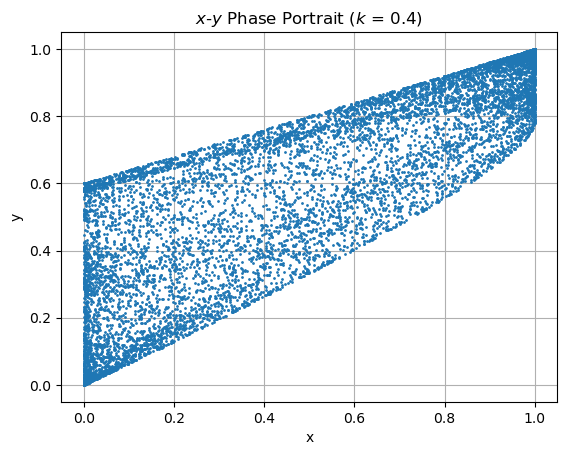

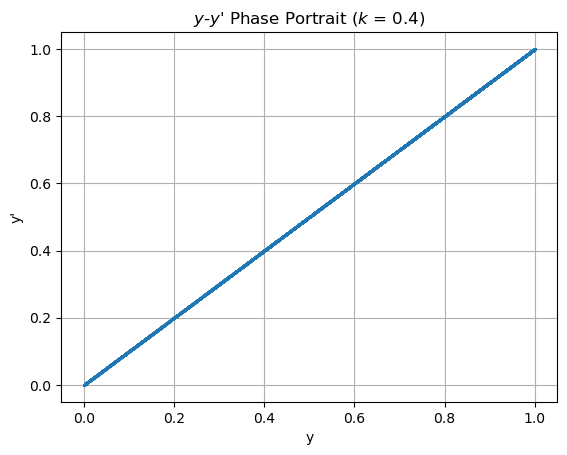

In [6]:
# Weak Synchronisation: k = 0.4, a = 1
k = 0.4
n_iterations = 10000
n_transients = 500
initial = (0.1, 0.2, 0.3)

plotgraf(initial, k, a, n_iterations, n_transients)

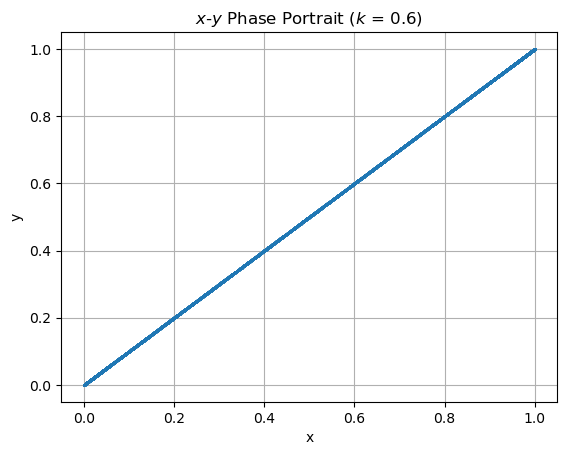

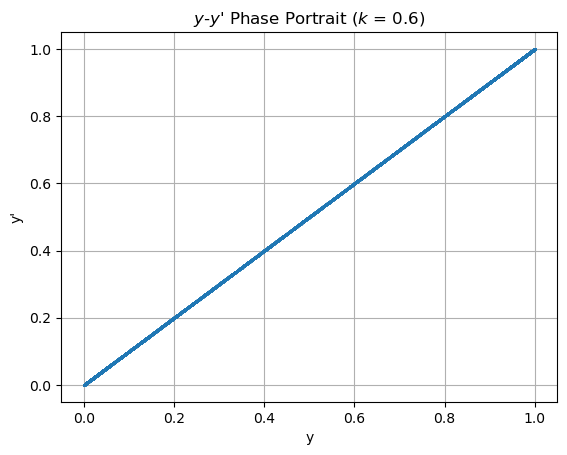

In [7]:
# Strong Synchronisation: k = 0.6, a = 1
k = 0.6
n_iterations = 10000
n_transients = 500
initial = (0.1, 0.2, 0.3)

plotgraf(initial, k, a, n_iterations, n_transients)

## Conditional and Transient Lyapunov Exponent Plots

In [8]:
def trans_lyapunov(a, k, initial_x, initial_y, n_iterations, n_transients):
    x, y, yres = initial_x, initial_y, initial_yres
    le_sum = np.zeros(2)
    
    v1 = np.array([1, 0])
    v2 = np.array([0, 1])
    
    for i in range(n_transients):
        x, y, yres = clm(x, y, yres, k, a = 1)

    for i in range(n_iterations):
        x, y, yres = clm(x, y, yres, k, a = 1)
        J = np.array([[4 * a * (1 - 2 * x), 0],
                      [k * 4 * a * (1 - 2 * x), 4 * a * (1 - 2 * y) * (1 - k)]])
        
        v1 = np.dot(J, v1)
        v2 = np.dot(J, v2)
        
        # Gram-Schmidt Orthogonalisation
        v2 -= (np.dot(v1, v2) / np.dot(v1, v1)) * v1
        
        # Normalisation
        v1_norm = np.linalg.norm(v1)
        v2_norm = np.linalg.norm(v2)
        if v1_norm == 0 or v2_norm == 0:
            return np.array([np.nan, np.nan])
        v1 /= v1_norm
        v2 /= v2_norm

        le_sum[0] += np.log(v1_norm)
        le_sum[1] += np.log(v2_norm)
    
    le_sum /= n_iterations
    return le_sum

In [9]:
def con_lyapunov(a, k, initial_x, initial_y, n_iterations, n_transients):
    x, y, yres = initial_x, initial_y, initial_yres
    le_sum = np.zeros(2)
    
    v1 = np.array([1, 0])
    v2 = np.array([0, 1])
    
    for i in range(n_transients):
        x, y, yres = clm(x, y, yres, k, a = 1)

    for i in range(n_iterations):
        x, y, yres = clm(x, y, yres, k, a = 1)
        J = np.array([[4 * a * (1 - 2 * y), 0],
                      [0, 4 * a * (1 - 2 * yres)]])
        
        v1 = np.dot(J, v1)
        v2 = np.dot(J, v2)
        
        # Gram-Schmidt Orthogonalisation
        v2 -= (np.dot(v1, v2) / np.dot(v1, v1)) * v1
        
        # Normalisation
        v1_norm = np.linalg.norm(v1)
        v2_norm = np.linalg.norm(v2)
        if v1_norm == 0 or v2_norm == 0:
            return np.array([np.nan, np.nan])
        v1 /= v1_norm
        v2 /= v2_norm

        le_sum[0] += np.log(v1_norm)
        le_sum[1] += np.log(v2_norm)
    
    le_sum /= n_iterations
    return le_sum

Note: Wrote two separate functions for conditional and transverse exponents as when trying to write one function with the Jacobian as a parameter, incorrect graphs were obtained

In [32]:
# Parameters
a = 1
k_values = np.linspace(0, 1, 1000)
initial_x, initial_y, initial_yres = np.random.rand(), np.random.rand(), np.random.rand()
n_iterations = 10000
n_transients = 500

con_le = []
trans_le = []

/tmp/ipykernel_4341/2861587145.py:7: RuntimeWarning: divide by zero encountered in log
  trans_le = np.log(1 - k_values) + np.array(trans_le)
/tmp/ipykernel_4341/2861587145.py:8: RuntimeWarning: divide by zero encountered in log
  con_le = np.log(1 - k_values) + np.array(con_le)


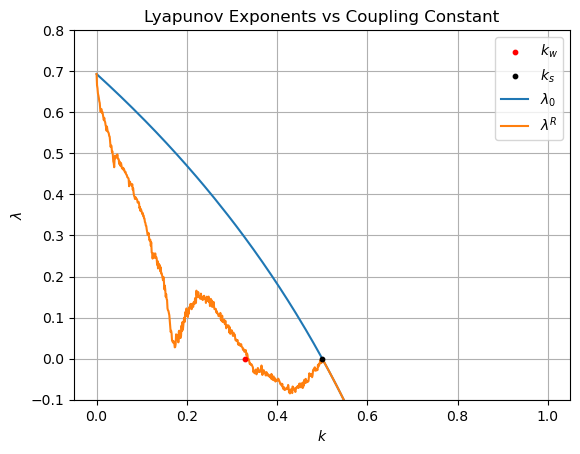

In [10]:
for k in k_values:
    le = trans_lyapunov(a, k, initial_x, initial_y, n_iterations, n_transients)
    trans_le.append(le[0])
    le = con_lyapunov(a, k, initial_x, initial_y, n_iterations, n_transients)
    con_le.append(le[0])
    
trans_le = np.log(1 - k_values) + np.array(trans_le)
con_le = np.log(1 - k_values) + np.array(con_le)

# Thresholds (Obtained by Eyeballing)
plt.scatter(0.328, 0, color = 'r', zorder = 4, s = 10, label = r'$k_{w}$')
plt.scatter(0.500, 0, color = 'k', zorder = 3, s = 10, label = r'$k_{s}$')

plt.plot(k_values, trans_le, zorder = 2, label = r'$\lambda_{0}$')
plt.plot(k_values, con_le, zorder = 2, label = r'$\lambda^{R}$')

plt.xlabel(r'$k$')
plt.ylabel(r'$\lambda$')
plt.ylim(-0.1, 0.8)
plt.title('Lyapunov Exponents vs Coupling Constant')
plt.legend()
plt.grid(True)
plt.show()

## More Lyapunov Analysis

In [10]:
# Storing the conditional lyapunov exponents from the first part
with open('ly_data30.csv', 'w') as file:
    w = csv.writer(file)
    for i in range(len(con_le)):
        w.writerow([con_le[i], k_values[i]])

NameError: name 'con_le' is not defined

In [11]:
lyap1, kval1 = np.loadtxt('Data_Lyapunov/ly_data.csv', unpack = True, delimiter = ',')
lyap2, kval2 = np.loadtxt('Data_Lyapunov/ly_data2.csv', unpack = True, delimiter = ',')
lyap3, kval3 = np.loadtxt('Data_Lyapunov/ly_data3.csv', unpack = True, delimiter = ',')
lyap4, kval4 = np.loadtxt('Data_Lyapunov/ly_data4.csv', unpack = True, delimiter = ',')
lyap5, kval5 = np.loadtxt('Data_Lyapunov/ly_data5.csv', unpack = True, delimiter = ',')
lyap6, kval6 = np.loadtxt('Data_Lyapunov/ly_data6.csv', unpack = True, delimiter = ',')
lyap7, kval7 = np.loadtxt('Data_Lyapunov/ly_data7.csv', unpack = True, delimiter = ',')
lyap8, kval8 = np.loadtxt('Data_Lyapunov/ly_data8.csv', unpack = True, delimiter = ',')
lyap9, kval9 = np.loadtxt('Data_Lyapunov/ly_data9.csv', unpack = True, delimiter = ',')
lyap10, kval10 = np.loadtxt('Data_Lyapunov/ly_data10.csv', unpack = True, delimiter = ',')
lyap11, kval11 = np.loadtxt('Data_Lyapunov/ly_data11.csv', unpack = True, delimiter = ',')
lyap12, kval12 = np.loadtxt('Data_Lyapunov/ly_data12.csv', unpack = True, delimiter = ',')
lyap13, kval13 = np.loadtxt('Data_Lyapunov/ly_data13.csv', unpack = True, delimiter = ',')
lyap14, kval14 = np.loadtxt('Data_Lyapunov/ly_data14.csv', unpack = True, delimiter = ',')
lyap15, kval15 = np.loadtxt('Data_Lyapunov/ly_data15.csv', unpack = True, delimiter = ',')
lyap16, kval16 = np.loadtxt('Data_Lyapunov/ly_data16.csv', unpack = True, delimiter = ',')
lyap17, kval17 = np.loadtxt('Data_Lyapunov/ly_data17.csv', unpack = True, delimiter = ',')
lyap18, kval18 = np.loadtxt('Data_Lyapunov/ly_data18.csv', unpack = True, delimiter = ',')
lyap19, kval19 = np.loadtxt('Data_Lyapunov/ly_data19.csv', unpack = True, delimiter = ',')
lyap20, kval20 = np.loadtxt('Data_Lyapunov/ly_data20.csv', unpack = True, delimiter = ',')
lyap21, kval21 = np.loadtxt('Data_Lyapunov/ly_data21.csv', unpack = True, delimiter = ',')
lyap22, kval22 = np.loadtxt('Data_Lyapunov/ly_data22.csv', unpack = True, delimiter = ',')
lyap23, kval23 = np.loadtxt('Data_Lyapunov/ly_data23.csv', unpack = True, delimiter = ',')
lyap24, kval24 = np.loadtxt('Data_Lyapunov/ly_data24.csv', unpack = True, delimiter = ',')
lyap25, kval25 = np.loadtxt('Data_Lyapunov/ly_data25.csv', unpack = True, delimiter = ',')
lyap26, kval26 = np.loadtxt('Data_Lyapunov/ly_data26.csv', unpack = True, delimiter = ',')
lyap27, kval27 = np.loadtxt('Data_Lyapunov/ly_data27.csv', unpack = True, delimiter = ',')
lyap28, kval28 = np.loadtxt('Data_Lyapunov/ly_data28.csv', unpack = True, delimiter = ',')
lyap29, kval29 = np.loadtxt('Data_Lyapunov/ly_data29.csv', unpack = True, delimiter = ',')
lyap30, kval30 = np.loadtxt('Data_Lyapunov/ly_data30.csv', unpack = True, delimiter = ',')

In [12]:
kvals = np.vstack([kval1, kval2, kval3, kval4, kval5, kval6, kval7, kval8, kval9, kval10,
                   kval11, kval12, kval13, kval14, kval15, kval16, kval17, kval18, kval19,
                   kval20, kval21, kval22, kval23, kval24, kval25, kval26, kval27, kval28,
                   kval29, kval30])
lyaps = np.vstack([lyap1, lyap2, lyap3, lyap4, lyap5, lyap6, lyap7, lyap8, lyap9, lyap10,
                   lyap11, lyap12, lyap13, lyap14, lyap15, lyap16, lyap17, lyap18, lyap19,
                   lyap20, lyap21, lyap22, lyap23, lyap24, lyap25, lyap26, lyap27, lyap28,
                   lyap29, lyap30])

avg_kval = np.mean(kvals, axis=0)
avg_lyap = np.mean(lyaps, axis=0)

In [13]:
del_l_k = np.gradient(avg_lyap, avg_kval)

In [14]:
# Points where dl/dk = 0 and corresponding k values
z_points = np.where(np.diff(np.sign(del_l_k)))[0]
z_kval = avg_kval[z_points] + 0.000498
print(z_kval)

[0.00950701 0.01050801 0.03853604 0.04354104 0.05655406 0.05755506
 0.06456206 0.06556307 0.07357107 0.07457207 0.12562313 0.12662413
 0.16966717 0.17267017 0.17367117 0.17867618 0.18067818 0.18268018
 0.18368118 0.18668419 0.18768519 0.2006982  0.2016992  0.2037012
 0.2047022  0.22372122 0.22472222 0.22672423 0.23172923 0.23273023
 0.23673424 0.23773524 0.25775526 0.25875626 0.29279029 0.29379129
 0.35084835 0.35184935 0.35585336 0.35685436 0.35885636 0.35985736
 0.36185936 0.36586337 0.37287037 0.37487237 0.41491241 0.41891642
 0.41991742 0.42091842 0.42492242 0.42692443 0.43393143 0.43893644
 0.43993744 0.44093844 0.44193944 0.44994745 0.45094845 0.4999975 ]


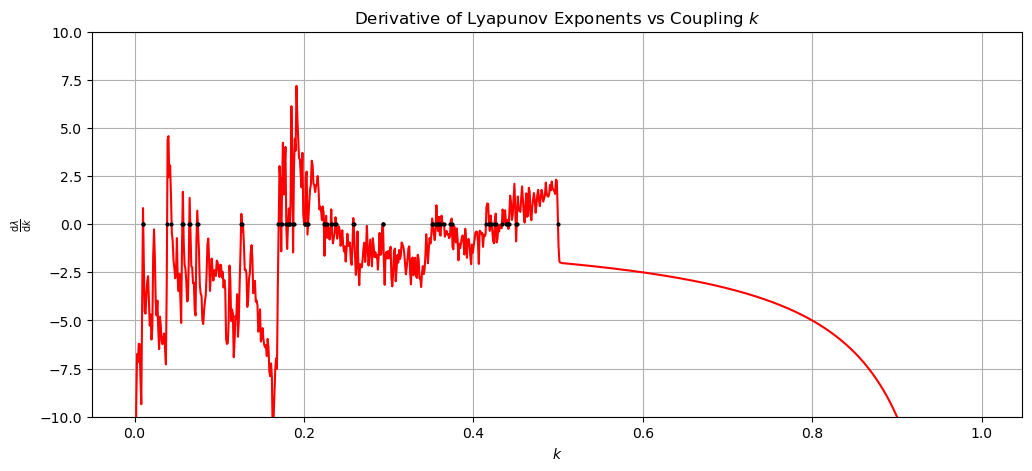

In [15]:
plt.figure(figsize=(12, 5))
plt.plot(avg_kval, del_l_k, linestyle = '-', color = 'r')
plt.scatter(z_kval, [0]*len(z_kval), s = 4, zorder = 5, color = 'k')
plt.xlabel(r'$k$')
plt.ylabel(r'$\frac{\mathrm{d} \lambda}{\mathrm{d} k}$')
plt.title('Derivative of Lyapunov Exponents vs Coupling $k$')
plt.ylim(-10, 10)
plt.grid(True)
plt.show()

### Variance in Lyapunov Exponent vs Coupling k

In [16]:
v = []
for i in range(0, len(lyaps[1])):
    v.append((np.std(np.array([lyap1[i], lyap2[i], lyap3[i], lyap4[i], lyap5[i], lyap6[i], lyap7[i], lyap8[i], lyap9[i], 
                               lyap10[i], lyap11[i], lyap12[i], lyap13[i], lyap14[i], lyap15[i], lyap16[i], lyap17[i],
                               lyap18[i], lyap19[i], lyap20[i], lyap21[i], lyap23[i], lyap24[i], lyap25[i]])))**2)

/home/loopynoodle/miniconda3/envs/physicsstuff/lib/python3.10/site-packages/numpy/core/_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


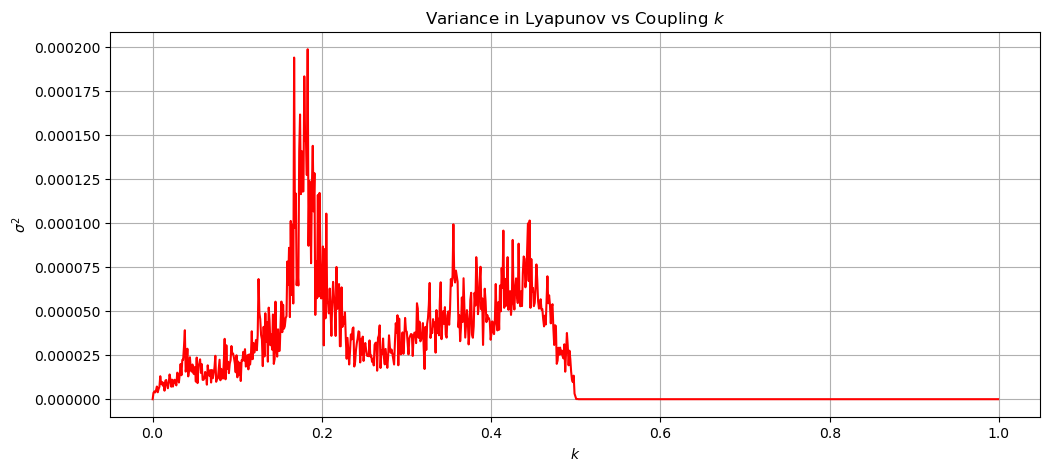

In [17]:
k_values = np.linspace(0, 1, 19)
plt.figure(figsize=(12, 5))
plt.plot(avg_kval[:-1], v[:-1], linestyle = '-', color = 'r')
plt.xlabel(r'$k$')
plt.ylabel(r'$\sigma^{2}$')
plt.title(r'Variance in Lyapunov vs Coupling $k$')
plt.grid(True)
plt.show()

## Plotting Thickness $\sigma$ and Cross Correlator $K_{xy}$ Against Coupling Parameter

DO NOT EXECUTE AGAIN UNLESS ABSOLUTELY NECESSARY. Takes forever to run the code.

In [18]:
# Generating Data to Work With
def data(n_iterations, k):
    x, y, yres = np.random.rand(), np.random.rand(), np.random.rand()
    
    x_values, y_values, yres_values = [], [], []

    for i in range(n_iterations):
        x, y, yres = clm(x, y, yres, k)
        x_values.append(x)
        y_values.append(y)
        yres_values.append(yres)
    
    return np.array(x_values), np.array(y_values), np.array(yres_values)

n_iterations = 50000
k_values = np.linspace(0, 1, 100)

In [27]:
def thickness(x_values, y_values, e = 0.001):
    local_devs = [] # local deviations
    N = len(x_values)

    for i in range(N):
        local_pts = np.abs(x_values - x_values[i]) < e # checking neighbourhood points
        if np.sum(local_pts) > 1:
            local_x = x_values[local_pts]
            local_y = y_values[local_pts]
            m, c = np.polyfit(local_x, local_y, 1) # linear interpolation
            local_fit = m * local_x + c
            local_dev = np.mean((local_y - local_fit) ** 2)
            local_devs.append(local_dev)

    return np.sqrt(np.mean(local_devs))

s = [thickness(*data(n_iterations, k)[:2]) for k in k_values]

In [15]:
def cross_cor(x_values, y_values):
    return np.corrcoef(x_values, y_values)[0, 1]

cross_corr = [cross_cor(*data(n_iterations, k)[:2]) for k in k_values]

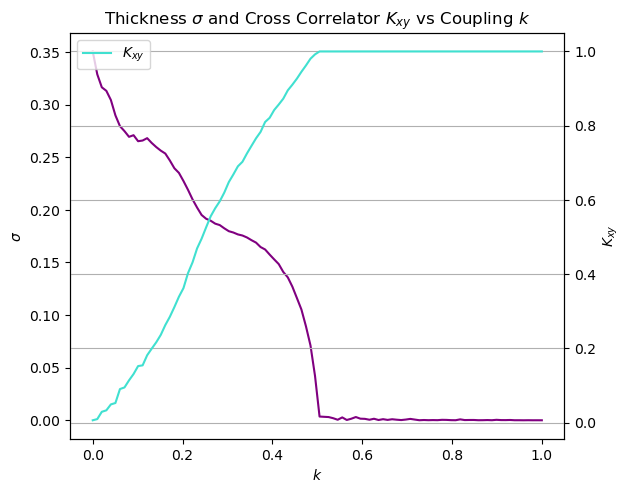

In [17]:
fig, ax1 = plt.subplots()

ax1.set_xlabel(r'$k$')
ax1.set_ylabel(r'$\sigma$')
ax1.plot(k_values, s, label = r'$\sigma$', color = 'purple')
ax1.tick_params(axis = 'y')

ax2 = ax1.twinx()
ax2.set_ylabel(r'$K_{xy}$')
ax2.plot(k_values, cross_corr, label = r'$K_{xy}$', color = 'turquoise')
ax2.tick_params(axis = 'y')

fig.tight_layout()
plt.title(r'Thickness $\sigma$ and Cross Correlator $K_{xy}$ vs Coupling $k$')
plt.legend()
plt.grid(True)
plt.show()

## Plotting Correlation Dimension $d_{c}$ Against Coupling Parameter

Here, the Grassberger-Procaccia algorithm is being used to find $d_{c}$. The correlation sum $C(\epsilon)$ counts the number of pairs of points that are close to each other (within a distance $\epsilon$).

In [4]:
@njit(nopython=True)
# Counting nearest neighbours
def NN(p, e):
    N = len(p)
    count = np.zeros(N, dtype = np.int32)
    for i in range(N):
        for j in range(N):
            if i != j:
                dist = np.sqrt((p[i, 0] - p[j, 0])**2 + (p[i, 1] - p[j, 1])**2)
                if dist < e:
                    count[i] += 1
    return count

C:\Users\Vijay\miniconda3\envs\physicsstuff\Lib\site-packages\numba\core\decorators.py:250: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


In [6]:
# Correlation Sum
def corsum(x_values, y_values, e):
    p = np.column_stack((x_values, y_values))  # combines the x-values and y-values into a single array of 2D points
    tree = cKDTree(p) # data structure to find nearest neighbours
    count = np.array([len(tree.query_ball_point(i, e)) - 1 for i in p])
     # tree.query_ball_pointreturns a list of indices of all points within epsilon from the given point
    C_e = np.mean(count) / len(p)
    return C_e

In [5]:
def d_c(x_values, y_values, e_values):
    C_e = np.array([corsum(x_values, y_values, e) for e in e_values])
    log_e = np.log(e_values)
    log_C_e = np.log(C_e)
    # linear fit to find the slope
    coef = np.polyfit(log_e, log_C_e, 1)
    return coef[0]  # slope is the correlation dimension

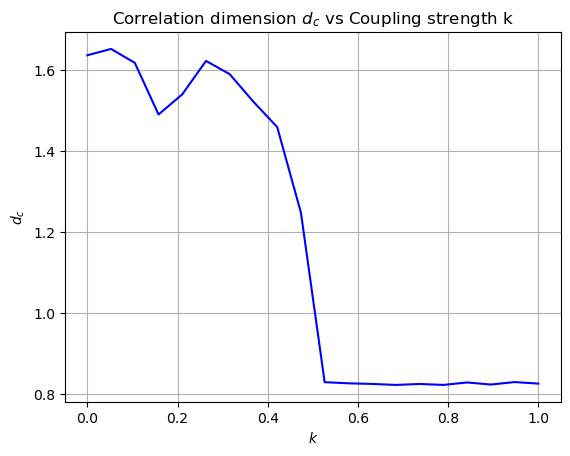

In [44]:
n_iterations = 50000
k_values = np.linspace(0, 1, 20)
e_values = np.logspace(-3, 0, 10) 

cd = []

for k in k_values:
    x_values, y_values, yres_values = data(n_iterations, k)
    dc = d_c(x_values, y_values, e_values)
    cd.append(dc)

plt.plot(k_values, cd, linestyle = '-', color = 'b')
plt.xlabel('$k$')
plt.ylabel('$d_c$')
plt.title('Correlation dimension $d_c$ vs Coupling strength k')
plt.grid(True)
plt.show()

# Finite-Time Lyapunov Exponents

## 1D Map

In [19]:
def map(x):
    return 4 * x * (1 - x)

def der(x):
    return 4 * (1 - 2 * x)

In [20]:
def time_ser(x0, n):
    x = np.zeros(n)
    x[0] = x0
    for i in range(1, n):
        x[i] = map(x[i - 1])
    return x

In [21]:
def lyap_fin(x, chonk):
    num_chonk = len(x) // chonk
    lye = np.zeros(num_chonk)
    for i in range(num_chonk):
        chonky = x[i * chonk:(i + 1) * chonk]
        lye[i] = (1/chonk) * np.sum(np.log(np.abs(der(chonky))))
    return lye

In [22]:
def hisst(lyapunov_exponents, var, bin, k):
    plt.hist(lyapunov_exponents, density = True, bins = bin, alpha = 0.75, color = 'plum', edgecolor = 'k')
    plt.xlabel(r'$\lambda$')
    plt.ylabel(r'$P(\lambda(100))$')
    plt.title(f'Distribution of Finite-time Lyapunov Exponents ($k$ = {k})')
    plt.figtext(0.15, 0.83, f'Variance: {var}')
    plt.show()

0.6799984465931641


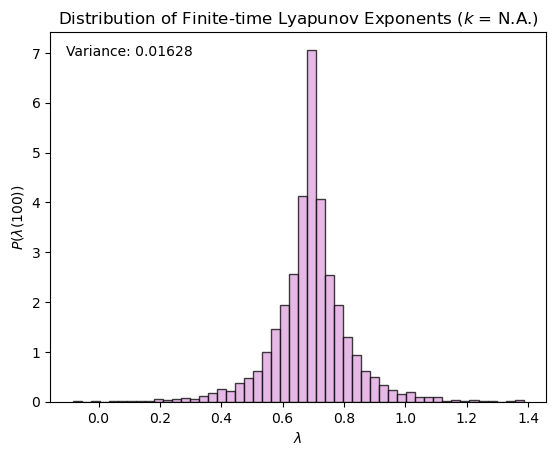

In [25]:
# Parameters
x0 = 0.1
n = 50000  
chonk = 10
bin = 50

x = time_ser(x0, n)
lye = lyap_fin(x, chonk)

counts, bin_edges = np.histogram(lye, bin)
peak = np.argmax(counts)
centre = (bin_edges[peak] + bin_edges[peak])/2
print(centre)

hisst(lye, np.round((np.std(lye))**2, 5), bin, 'N.A.')

## 2D Map

In [50]:
def chunker(xs, chonk):
    return (xs[pos:pos + chonk] for pos in range(0, len(xs), chonk))

In [51]:
x, y, yres = data(50000, 0.5)

In [62]:
x_chonk, y_chonk = [], []
for grp in chunker(x, 10):
    x_chonk.append(grp)
for grp in chunker(y, 10):
    y_chonk.append(grp)

In [63]:
def ly2D(x_chunk, y_chunk, k, a = 1):
    chonk = 10
    n_transients = 0
    lye2D = []
    for i in range(0, len(x_chonk)):
        ly = con_lyapunov(a, k, x_chonk[i][0], y_chonk[i][0], chonk, n_transients)
        ly = np.log(1 - k) + np.array(ly[0])
        lye2D.append(ly)
    return lye2D

-0.0003233429585793868


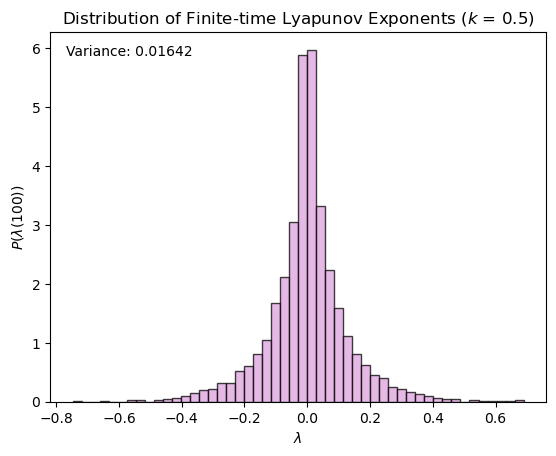

In [66]:
k = 0.5
l1 = ly2D(x_chonk, y_chonk, k)

counts, bin_edges = np.histogram(l1, bin)
peak = np.argmax(counts)
centre = (bin_edges[peak] + bin_edges[peak])/2
print(centre)

hisst(l1, np.round((np.std(l1))**2, 5), 50, np.round(k, 3))

0.4801164020118356


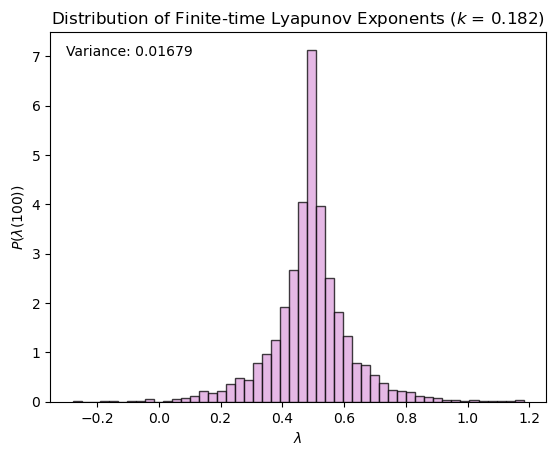

In [67]:
k = 0.18167918
l2 = ly2D(x_chonk, y_chonk, k)

counts, bin_edges = np.histogram(l2, bin)
peak = np.argmax(counts)
centre = (bin_edges[peak] + bin_edges[peak])/2
print(centre)

hisst(l2, np.round((np.std(l2))**2, 5), 50, np.round(k, 3))

0.6223034530573568


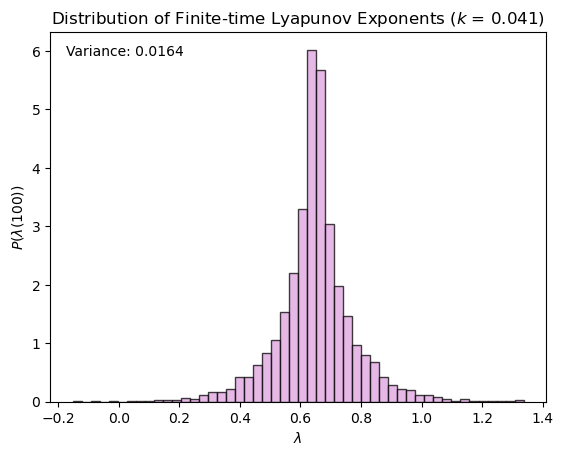

In [68]:
k = 0.04103854
l3 = ly2D(x_chonk, y_chonk, k)

counts, bin_edges = np.histogram(l3, bin)
peak = np.argmax(counts)
centre = (bin_edges[peak] + bin_edges[peak])/2
print(centre)

hisst(l3, np.round((np.std(l3))**2, 5), 50, np.round(k, 3))

0.2936473225151548


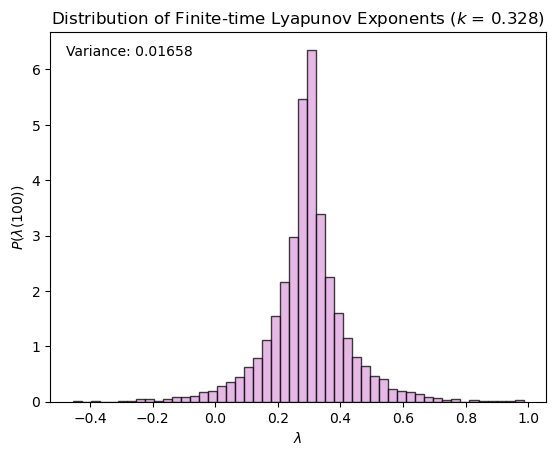

In [69]:
k = 0.328
l4 = ly2D(x_chonk, y_chonk, k)

counts, bin_edges = np.histogram(l4, bin)
peak = np.argmax(counts)
centre = (bin_edges[peak] + bin_edges[peak])/2
print(centre)

hisst(l4, np.round((np.std(l4))**2, 5), 50, k)

## Dynamics at $k_{w}$ and $k_{s}$

For comparison with the coupled tent map system.

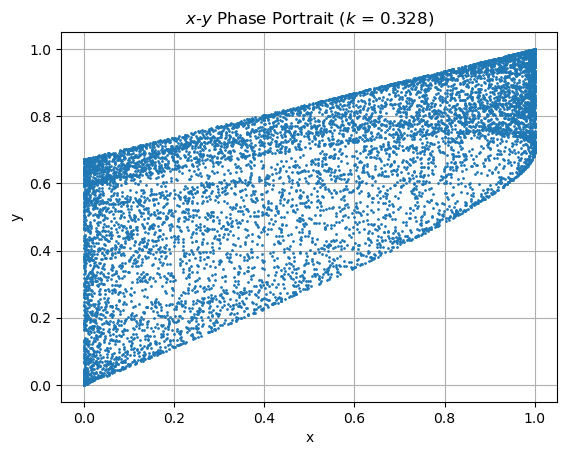

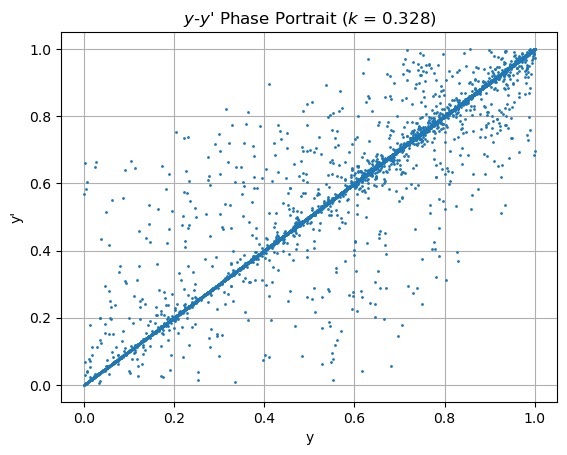

In [47]:
# Unsynchronised Case: k = 0.328, a = 1
a = 1
k = 0.328
n_iterations = 10000
n_transients = 500
initial = (np.random.rand(), np.random.rand(), np.random.rand())

plotgraf(initial, k, a, n_iterations, n_transients)

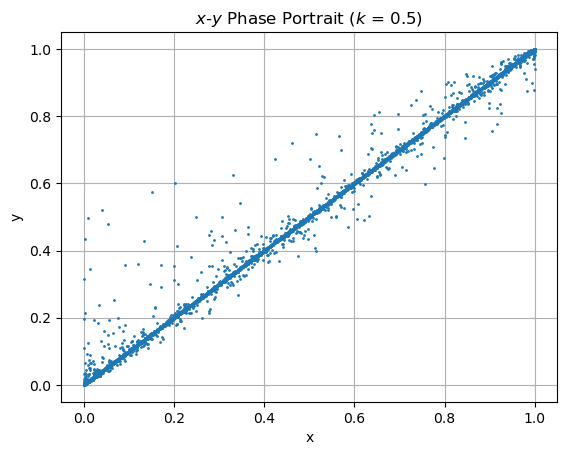

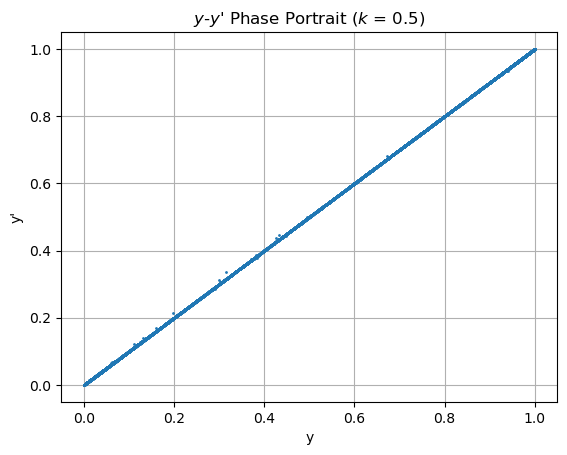

In [48]:
plotgraf(initial, 0.5, a, n_iterations, n_transients)

In [49]:
print(initial)

(0.8238448418984619, 0.3205236575535735, 0.7813905349518432)
